In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

c:\users\shubh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
all_files = os.listdir('actigraphy/')
all_files[:5]

['hchs-sol-sueno-00163225.csv',
 'hchs-sol-sueno-00238589.csv',
 'hchs-sol-sueno-00258857.csv',
 'hchs-sol-sueno-00306064.csv',
 'hchs-sol-sueno-00311734.csv']

In [3]:
N = 10

In [4]:
data = [pd.read_csv('actigraphy/'+i) for i in all_files[:N]]

In [5]:
data[0].columns

Index(['pid', 'sawa2', 'line', 'offwrist', 'activity', 'marker', 'whitelight',
       'redlight', 'greenlight', 'bluelight', 'wake', 'interval', 'starth',
       'day', 'dayofweek', 'validday', 'time'],
      dtype='object')

In [88]:
print([d.shape for d in data])

[(22308, 17), (19761, 17), (20252, 17), (23678, 17), (22944, 17), (20153, 17), (52414, 17), (22931, 17), (22887, 17), (22958, 17)]


In [117]:
def sleep_efficiency(df_raw):
    df = df_raw.drop(['pid', 'sawa2'], axis = 1)
    df['interval_num'] = df.interval.replace({'ACTIVE': 3, 'REST': 1, 'REST-S': 0}) # so the differences are unique
    epochs_in_each_interval = (df.loc[df.interval_num.diff() != 0, :] # epochs where state changed
                               .line[1:] # leaving out the first NaN
                               .diff()[1:]) # number of epochs in each state, starting from first rest
    epochs_in_bed_awake = epochs_in_each_interval[0::3].reset_index(drop = True)
    epochs_asleep = epochs_in_each_interval[1::3].reset_index(drop = True)
    epochs_awake = epochs_in_each_interval[2::3].reset_index(drop = True)
    sleep_eff = epochs_asleep/(epochs_asleep + epochs_in_bed_awake)
    return sleep_eff

In [131]:
sleep_efficiency(data[8]) # 0, 1, 2 are pretty good, 7, 8 have bad sleep 

0    0.996774
1    0.992042
2    0.993103
3    0.873196
4    0.674912
5    0.710016
6    0.632348
7    0.664649
8         NaN
Name: line, dtype: float64

In [138]:
def sleep_efficiency_db_version(df_raw):
    df = df_raw.drop(['pid', 'sawa2'], axis = 1)
    df['interval_num'] = df.interval.replace({'ACTIVE': 3, 'REST': 1, 'REST-S': 0}) # so the differences are unique
#     epochs_in_each_interval = (df.loc[df.interval_num.diff() != 0, :] # epochs where state changed
#                                .line[1:] # leaving out the first NaN
#                                .diff()[1:]) # number of epochs in each state, starting from first rest
#     epochs_in_bed_awake = epochs_in_each_interval[0::3].reset_index(drop = True)
#     epochs_asleep = epochs_in_each_interval[1::3].reset_index(drop = True)
#     epochs_awake = epochs_in_each_interval[2::3].reset_index(drop = True)
#     sleep_eff = epochs_asleep/(epochs_asleep + epochs_in_bed_awake)
    return df.interval.value_counts()#interval_num#.diff()

In [139]:
sleep_efficiency_db_version(data[3]) # Need to deal with these

ACTIVE    14109
REST-S     5889
EXCLUD     3636
REST         44
Name: interval, dtype: int64

# Trial and Error Below

In [50]:
d = data[0]
d = d.drop(['pid', 'sawa2'], axis = 1)
d.tail()
# d.shape

,line,offwrist,activity,marker,whitelight,redlight,greenlight,bluelight,wake,interval,starth,day,dayofweek,validday,time
22303,22304,0,216,0,481.76,35.50,44.10,15.600,1.0,ACTIVE,0,8,6,1,9:36:30
22304,22305,0,83,0,481.76,35.50,44.10,15.600,NaN,ACTIVE,0,8,6,1,9:37:00
22305,22306,0,238,0,239.94,21.10,21.10,7.630,NaN,ACTIVE,0,8,6,1,9:37:30
22306,22307,0,402,0,34.94,5.17,2.64,0.368,NaN,ACTIVE,0,8,6,1,9:38:00
22307,22308,0,487,0,35.43,5.63,2.58,0.323,NaN,ACTIVE,0,8,6,1,9:38:30


In [110]:
# d.offwrist.value_counts(normalize = True)
# d.validday.value_counts(normalize = True)
# d.marker.value_counts(normalize = True)
# d.loc[d.marker == 1, :]
# # pd.set_option('display.max_rows', 50)
# # display(d.iloc[320:330, :])
# d.loc[d.interval == 'REST-S', :].wake.value_counts(normalize = True)

In [72]:
d['interval_num'] = d.interval.replace({'ACTIVE': 3, 'REST': 1, 'REST-S': 0})
d.head()

,line,offwrist,activity,marker,whitelight,redlight,greenlight,bluelight,wake,interval,starth,day,dayofweek,validday,time,interval_num
0,1,0,129,0,44.34,4.95,3.650,1.29,NaN,ACTIVE,0,1,5,1,15:45:00,3
1,2,0,271,0,71.93,4.34,6.850,2.17,NaN,ACTIVE,0,1,5,1,15:45:30,3
2,3,0,171,0,61.29,4.16,5.630,2.53,NaN,ACTIVE,0,1,5,1,15:46:00,3
3,4,0,281,0,36.23,1.91,3.500,1.26,NaN,ACTIVE,0,1,5,1,15:46:30,3
4,5,0,365,0,18.07,2.76,0.419,7.63,1.0,ACTIVE,0,1,5,1,15:47:00,3


In [75]:
d.interval_num.diff().value_counts(normalize = True)

 0.0    0.998655
 3.0    0.000448
-1.0    0.000448
-2.0    0.000448
Name: interval_num, dtype: float64

In [107]:
d.loc[d.interval_num.diff() != 0, :][['line', 'interval', 'day','time']]#[1:]#.diff()[1:].reset_index(drop = True)

,line,interval,day,time
0,1,ACTIVE,1,15:45:00
325,326,REST,1,18:27:30
341,342,REST-S,1,18:35:30
401,402,ACTIVE,1,19:05:30
558,559,REST,1,20:24:00
579,580,REST-S,1,20:34:30
830,831,ACTIVE,1,22:40:00
1009,1010,REST,1,0:09:30
1011,1012,REST-S,1,0:10:30
2211,2212,ACTIVE,1,10:10:30


In [112]:
epochs_in_each_interval = d.loc[d.interval_num.diff() != 0, :].line[1:].diff()[1:]#.reset_index(drop = True)

In [116]:
d

,line,offwrist,activity,marker,whitelight,redlight,greenlight,bluelight,wake,interval,starth,day,dayofweek,validday,time,interval_num
0,1,0,129,0,44.34,4.95,3.650,1.290,NaN,ACTIVE,0,1,5,1,15:45:00,3
1,2,0,271,0,71.93,4.34,6.850,2.170,NaN,ACTIVE,0,1,5,1,15:45:30,3
2,3,0,171,0,61.29,4.16,5.630,2.530,NaN,ACTIVE,0,1,5,1,15:46:00,3
3,4,0,281,0,36.23,1.91,3.500,1.260,NaN,ACTIVE,0,1,5,1,15:46:30,3
4,5,0,365,0,18.07,2.76,0.419,7.630,1.0,ACTIVE,0,1,5,1,15:47:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22303,22304,0,216,0,481.76,35.50,44.100,15.600,1.0,ACTIVE,0,8,6,1,9:36:30,3
22304,22305,0,83,0,481.76,35.50,44.100,15.600,NaN,ACTIVE,0,8,6,1,9:37:00,3
22305,22306,0,238,0,239.94,21.10,21.100,7.630,NaN,ACTIVE,0,8,6,1,9:37:30,3
22306,22307,0,402,0,34.94,5.17,2.640,0.368,NaN,ACTIVE,0,8,6,1,9:38:00,3


In [111]:
d.loc[d.interval_num.diff() != 0, :].line#[1:].diff()[1:]#.reset_index(drop = True)

0            1
325        326
341        342
401        402
558        559
579        580
830        831
1009      1010
1011      1012
2211      2212
3635      3636
3649      3650
4918      4919
6380      6381
6513      6514
7890      7891
9487      9488
9489      9490
10370    10371
12660    12661
12662    12663
13230    13231
14859    14860
14868    14869
16091    16092
17921    17922
17942    17943
19105    19106
20977    20978
21098    21099
22071    22072
Name: line, dtype: int64

In [113]:
epochs_in_each_interval

341        16.0
401        60.0
558       157.0
579        21.0
830       251.0
1009      179.0
1011        2.0
2211     1200.0
3635     1424.0
3649       14.0
4918     1269.0
6380     1462.0
6513      133.0
7890     1377.0
9487     1597.0
9489        2.0
10370     881.0
12660    2290.0
12662       2.0
13230     568.0
14859    1629.0
14868       9.0
16091    1223.0
17921    1830.0
17942      21.0
19105    1163.0
20977    1872.0
21098     121.0
22071     973.0
Name: line, dtype: float64

In [114]:
epochs_in_bed = epochs_in_each_interval[0::3]
epochs_sleep = epochs_in_each_interval[1::3]
epochs_awake = epochs_in_each_interval[2::3]

In [115]:
display(epochs_in_bed, epochs_sleep, epochs_awake)

341       16.0
579       21.0
1011       2.0
3649      14.0
6513     133.0
9489       2.0
12662      2.0
14868      9.0
17942     21.0
21098    121.0
Name: line, dtype: float64

401        60.0
830       251.0
2211     1200.0
4918     1269.0
7890     1377.0
10370     881.0
13230     568.0
16091    1223.0
19105    1163.0
22071     973.0
Name: line, dtype: float64

558       157.0
1009      179.0
3635     1424.0
6380     1462.0
9487     1597.0
12660    2290.0
14859    1629.0
17921    1830.0
20977    1872.0
Name: line, dtype: float64

In [109]:
epochs_sleep.reset_index(drop = True) / (epochs_sleep.reset_index(drop = True) + epochs_in_bed.reset_index(drop = True))

0    0.789474
1    0.922794
2    0.998336
3    0.989088
4    0.911921
5    0.997735
6    0.996491
7    0.992695
8    0.982264
9    0.889397
Name: line, dtype: float64

In [89]:
d.loc[d.interval_num.diff() == -2, :]
# d.iloc[339:443,:]

,line,offwrist,activity,marker,whitelight,redlight,greenlight,bluelight,wake,interval,starth,day,dayofweek,validday,time,interval_num
325,326,0,571,1,1.05,0.0431,0.1050,0.0347,1.0,REST,0,1,5,1,18:27:30,1
558,559,0,115,1,4.44,0.8940,0.2770,0.0347,1.0,REST,0,1,5,1,20:24:00,1
1009,1010,0,94,1,0.67,0.0170,0.0694,0.0235,1.0,REST,0,1,6,1,0:09:30,1
3635,3636,0,94,1,0.73,0.0256,0.0756,0.0093,1.0,REST,0,2,6,1,22:02:30,1
6380,6381,0,183,1,0.67,0.0170,0.0694,0.0235,1.0,REST,0,3,7,1,20:55:00,1
9487,9488,0,177,1,1.33,0.0431,0.1390,0.0206,1.0,REST,0,4,1,1,22:48:30,1
12660,12661,0,31,1,0.06,0.0128,0.0012,0.0215,1.0,REST,0,5,3,1,1:15:00,1
14859,14860,0,47,0,0.06,0.0128,0.0012,0.0215,1.0,REST,0,6,3,1,19:34:30,1
17921,17922,0,309,1,0.67,0.0170,0.0694,0.0235,1.0,REST,0,7,4,1,21:05:30,1
20977,20978,0,786,1,2.54,0.0512,0.2660,0.0880,1.0,REST,0,8,5,1,22:33:30,1


In [78]:
d.loc[d.interval_num.diff() == -1, :]

,line,offwrist,activity,marker,whitelight,redlight,greenlight,bluelight,wake,interval,starth,day,dayofweek,validday,time,interval_num
341,342,0,28,0,0.36,0.0128,0.0378,0.0023,1.0,REST-S,0,1,5,1,18:35:30,0
579,580,0,31,0,0.51,0.0128,0.0523,0.0173,1.0,REST-S,0,1,5,1,20:34:30,0
1011,1012,0,0,0,0.19,0.0128,0.0173,0.0059,0.0,REST-S,0,1,6,1,0:10:30,0
3649,3650,0,0,0,0.51,0.0128,0.0523,0.0173,0.0,REST-S,0,2,6,1,22:09:30,0
6513,6514,0,11,0,0.51,0.0128,0.0523,0.0173,1.0,REST-S,0,3,7,1,22:01:30,0
9489,9490,0,71,0,0.69,0.0256,0.0694,0.0235,1.0,REST-S,0,4,1,1,22:49:30,0
12662,12663,0,0,0,0.06,0.0128,0.0012,0.0215,0.0,REST-S,0,5,3,1,1:16:00,0
14868,14869,0,1,0,0.19,0.0128,0.0173,0.0059,0.0,REST-S,0,6,3,1,19:39:00,0
17942,17943,0,1,0,0.36,0.0128,0.0378,0.0023,1.0,REST-S,0,7,4,1,21:16:00,0
21098,21099,0,0,0,0.52,0.0170,0.0523,0.0235,0.0,REST-S,0,8,5,1,23:34:00,0


In [80]:
d.iloc[339:343, :]

,line,offwrist,activity,marker,whitelight,redlight,greenlight,bluelight,wake,interval,starth,day,dayofweek,validday,time,interval_num
339,340,0,0,0,0.19,0.0128,0.0173,0.0059,0.0,REST,0,1,5,1,18:34:30,1
340,341,0,8,0,0.36,0.0128,0.0378,0.0023,0.0,REST,0,1,5,1,18:35:00,1
341,342,0,28,0,0.36,0.0128,0.0378,0.0023,1.0,REST-S,0,1,5,1,18:35:30,0
342,343,0,0,0,0.19,0.0128,0.0173,0.0059,0.0,REST-S,0,1,5,1,18:36:00,0


<AxesSubplot:>

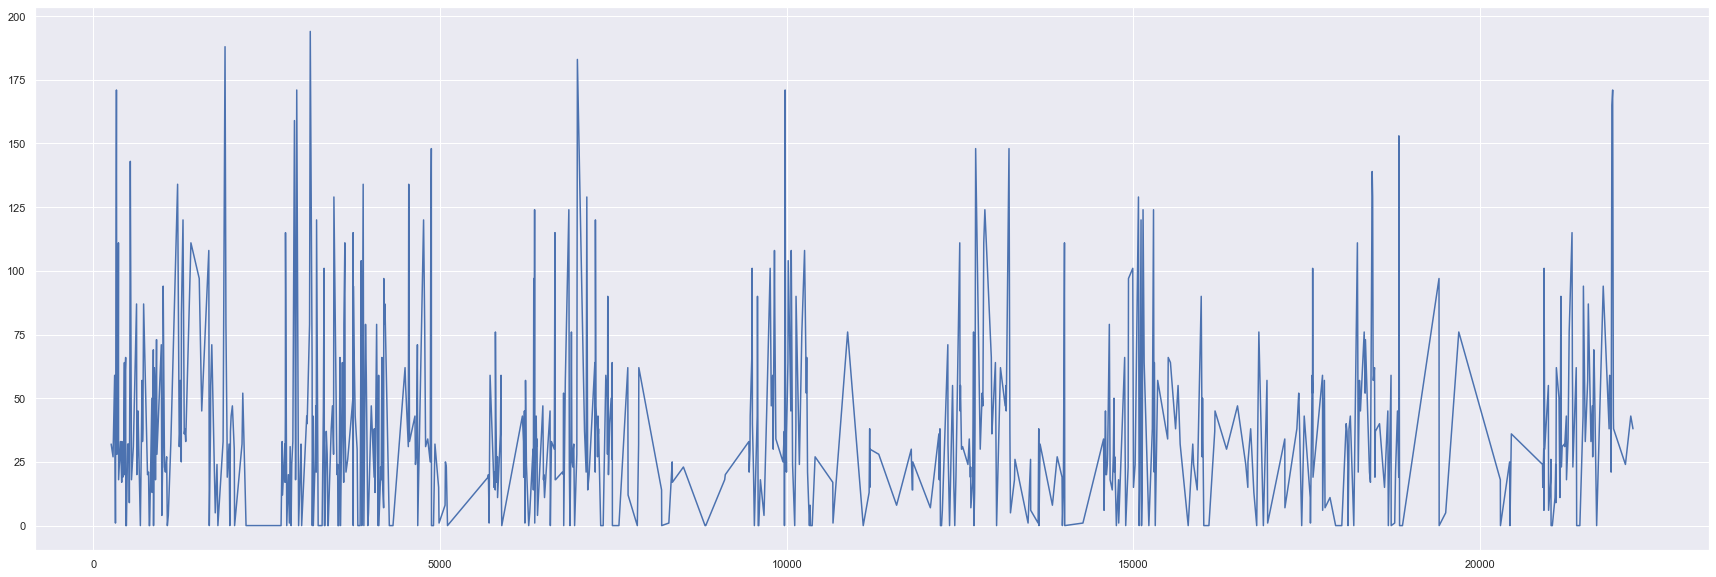

In [65]:
d.loc[d.wake.diff() == 1, :].activity.plot()#.value_counts(normalize = True)

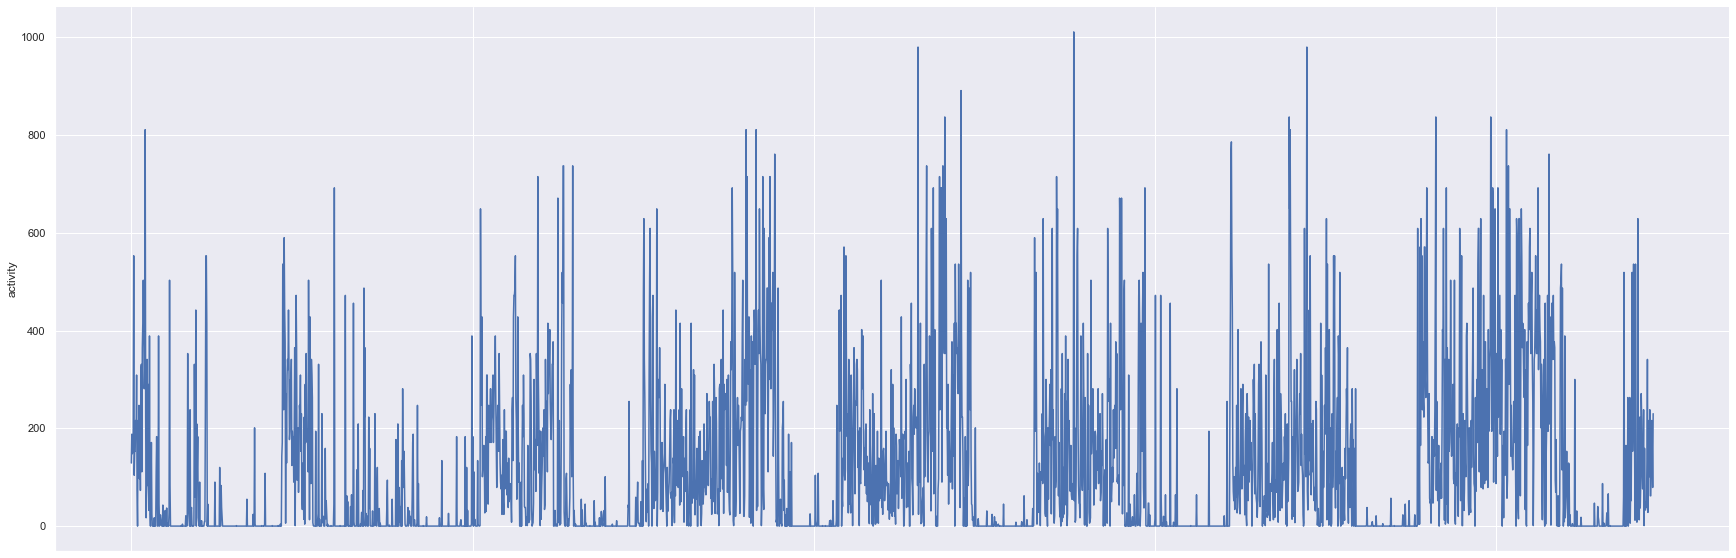

In [16]:
ax = sns.lineplot(data = d.iloc[::7,:], x='index', y="activity")
ax.set(xticklabels = [], xlabel = None)
sns.set(rc={'figure.figsize':(30,10)})
ax.tick_params(bottom = False)
sns.despine()

# White Light

In [105]:
d = data[0]
d['whitelightlog'] = np.log(d.whitelight)

c:\users\shubh\appdata\local\programs\python\python36\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


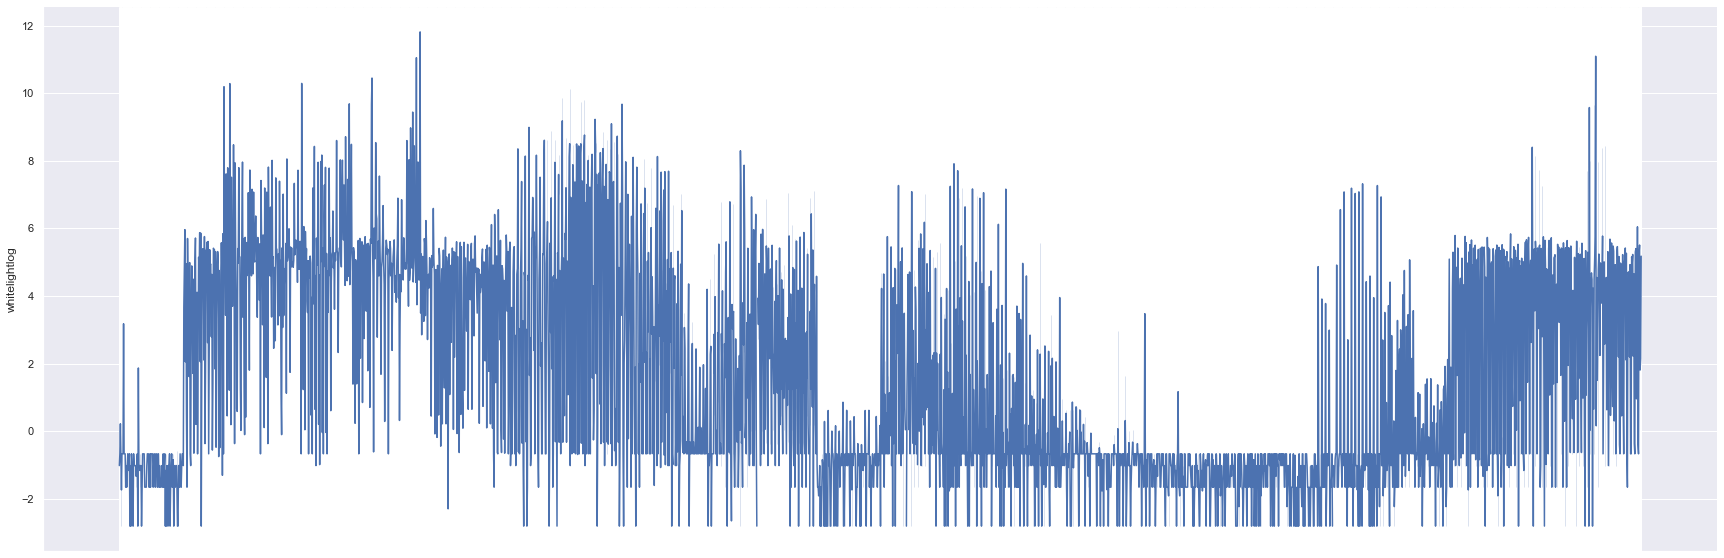

In [106]:
ax = sns.lineplot(data = data[0].iloc[::7,:], x='time', y="whitelightlog")
ax.set(xticklabels = [], xlabel = None)
sns.set(rc={'figure.figsize':(30,10)})
ax.tick_params(bottom = False)
sns.despine()

# Across Participants

In [104]:
# Moving average, align times

In [95]:
from matplotlib import pyplot as plt

In [97]:
all_dfs = [pd.read_csv('actigraphy/'+i) for i in all_files]

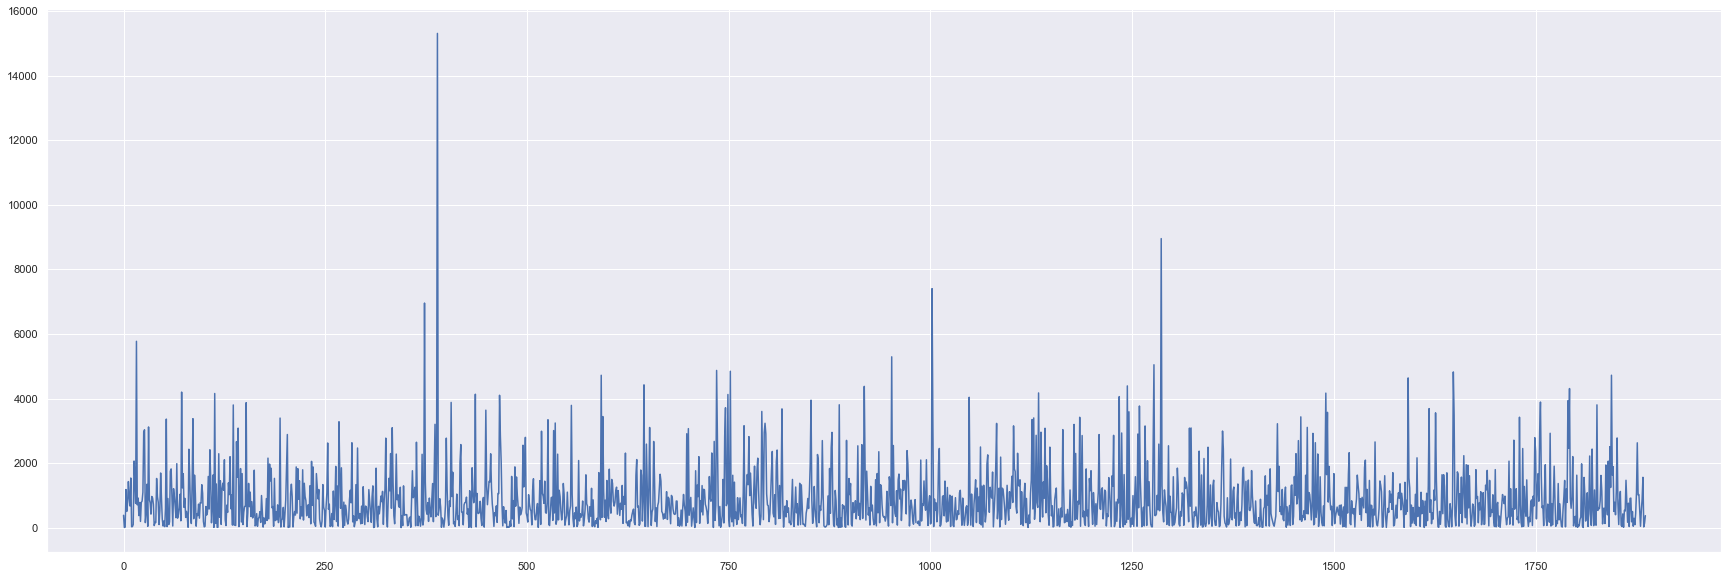

In [99]:
white_light_avg = [np.mean(s.whitelight) for s in all_dfs]
plt.plot(white_light_avg)
plt.show()